# Load Data

In [ ]:
import pandas as pd

# For upto date data, visit:
# github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

global_data = pd.read_csv('time_series_covid19_confirmed_global.csv')

In [2]:
global_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,764,764,765,844,851,852,852,852,852,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,84,86,86,86,86,86,86,88,91,92


# Aggregate country counts
Some countries have data for Provinces/States, lets just sum all those so we have total country count

In [3]:
global_data_summed = global_data.groupby('Country/Region').sum()

df = global_data_summed.drop(['Lat', 'Long'], axis=1).reset_index()

In [4]:
df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917
1,Albania,0,0,0,0,0,0,0,0,0,...,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263
2,Algeria,0,0,0,0,0,0,0,0,0,...,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265
3,Andorra,0,0,0,0,0,0,0,0,0,...,764,764,765,844,851,852,852,852,852,852
4,Angola,0,0,0,0,0,0,0,0,0,...,84,86,86,86,86,86,86,88,91,92


#  List all countries

In [6]:
# these are the countries we can pass into plotting method
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [12]:
# plot confirmed cases for countries over time. Modify these values to change your graph.
countries_to_plot = ['US', 'Russia', 'Italy', 'Germany', 'India']

# US Date format: 'MM/DD/YYYY'
start_date = '01/22/2020'
end_date = '06/08/2020'

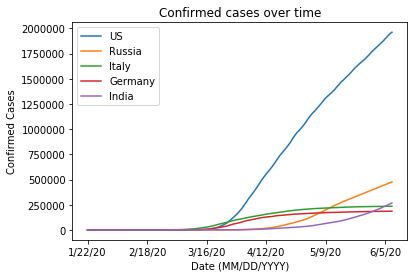

In [13]:
# Plot the data 

import matplotlib.pyplot as plt
import datetime

def get_index_from_date(date_string):
    first_date = datetime.datetime(2020, 1, 22)
    
    date_list = [int(x) for x in date_string.split('/')]
    date_object = datetime.datetime(date_list[-1], date_list[0], date_list[1])
    return (date_object-first_date).days
dates = list(df)[1:]

start_index = get_index_from_date(start_date)
end_index = get_index_from_date(end_date)

x_values = dates[start_index:end_index+1]

for country in countries_to_plot:
    country_df = df[df['Country/Region'] == country]
    y_values = [int(country_df[col]) for col in x_values]
    plt.plot(x_values, y_values, label=country)
    
plt.title('Confirmed cases over time')
skip = max(len(x_values)//5, 1) # Helps to ensure we dont add too many tick marks
plt.xticks(x_values[::skip])
plt.xlabel("Date (MM/DD/YYYY)")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()